In [3]:
import pandas as pd
import numpy as np
import multiprocessing
import warnings

from copy import deepcopy
from data.genome_5 import Genome, genome_score

warnings.filterwarnings(action='ignore')
np.random.seed(777)

In [4]:
CPU_CORE = multiprocessing.cpu_count() # 멀티프로세싱 CPU 사용 수
N_POPULATION = 100                      # 세대당 생성수
N_BEST = 10                             # 베스트 수
N_CHILDREN = 5                         # 자손 유전자 수
PROB_MUTATION = 0.5                    # 돌연변이
REVERSE = False                        # 배열 순서 (False: ascending order, True: descending order)
'''
돌연변이 수를 낮추는 것이 도움될 수도, 너무 튀는 경향을 잡아주는 것
이를 조정하는 기준은, epoch 진행 시 mean 값을 보고... 너무 큰 차이가 나면 줄여야 할 듯
'''

score_ini = 1e8                        # 초기 점수
input_length = 125                     # 입력 데이터 길이
output_length_1 = 9                    # Event (CHECK_1~4, PROCESS)
output_length_2 = 12                   # MOL(0~5.5, step:0.5)
h1 = 50                                # 히든레이어1 노드 수
h2 = 50                                # 히든레이어2 노드 수
h3 = 50                                # 히든레이어3 노드 수
EPOCHS = 30                            # 반복 횟수

genomes = []
for _ in range(N_POPULATION):
    genome = Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3)
    genomes.append(genome)
try:
    for i in range(N_BEST):
        genomes[i] = best_genomes[i]
except:
    best_genomes = []
    for _ in range(5):
        genome = Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3)
        best_genomes.append(genome)

In [5]:
n_gen = 1
score_history = []
high_score_history = []
mean_score_history = []

while n_gen <= EPOCHS:    
    genomes = np.array(genomes)
    
    while len(genomes)%CPU_CORE != 0:
        genomes = np.append(genomes, Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3))
    genomes = genomes.reshape((len(genomes)//CPU_CORE, CPU_CORE))
    
    for idx, _genomes in enumerate(genomes):
        if __name__ == '__main__':
            pool = multiprocessing.Pool(processes=CPU_CORE)
            genomes[idx] = pool.map(genome_score, _genomes)
            pool.close()
            pool.join()    
    genomes = list(genomes.reshape(genomes.shape[0]*genomes.shape[1]))    
    
     # score에 따라 정렬
    genomes.sort(key=lambda x: x.score, reverse=REVERSE)
    
    # 평균 점수
    s = 0 
    for i in range(N_BEST):
        s += genomes[i].score
    s /= N_BEST
    
    # Best Score
    bs = genomes[0].score 
    
    # Best Model 추가
    if best_genomes is not None:
        genomes.extend(best_genomes)
        
    # score에 따라 정렬
    genomes.sort(key=lambda x: x.score, reverse=REVERSE)
    
    score_history.append([n_gen, genomes[0].score])
    high_score_history.append([n_gen, bs])
    mean_score_history.append([n_gen, s])
    
    # 결과 출력
    print('EPOCH #%s\tHistory Best Score: %s\tBest Score: %s\tMean Score: %s' % (n_gen, genomes[0].score, bs, s))    
    
    # 모델 업데이트
    best_genomes = deepcopy(genomes[:N_BEST])
    
    # CHILDREN 생성
    for i in range(N_CHILDREN):
        new_genome = deepcopy(best_genomes[0])
        a_genome = np.random.choice(best_genomes)
        b_genome = np.random.choice(best_genomes)
        
        # Generate New Genome
        '''
        for j in range(input_length):
            cut = np.random.randint(new_genome.w1.shape[1])
            new_genome.w1[j, :cut] = a_genome.w1[j, :cut]
            new_genome.w1[j, cut:] = b_genome.w1[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w2.shape[1])
            new_genome.w2[j, :cut] = a_genome.w2[j, :cut]
            new_genome.w2[j, cut:] = b_genome.w2[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w3.shape[1])
            new_genome.w3[j, :cut] = a_genome.w3[j, :cut]
            new_genome.w3[j, cut:] = b_genome.w3[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w4.shape[1])
            new_genome.w4[j, :cut] = a_genome.w4[j, :cut]
            new_genome.w4[j, cut:] = b_genome.w4[j, cut:]
            
        for j in range(input_length):
            cut = np.random.randint(new_genome.w5.shape[1])
            new_genome.w5[j, :cut] = a_genome.w5[j, :cut]
            new_genome.w5[j, cut:] = b_genome.w5[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w6.shape[1])
            new_genome.w6[j, :cut] = a_genome.w6[j, :cut]
            new_genome.w6[j, cut:] = b_genome.w6[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w7.shape[1])
            new_genome.w7[j, :cut] = a_genome.w7[j, :cut]
            new_genome.w7[j, cut:] = b_genome.w7[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w8.shape[1])
            new_genome.w8[j, :cut] = a_genome.w8[j, :cut]
            new_genome.w8[j, cut:] = b_genome.w8[j, cut:]
        '''
        
        # A
        for j in range(input_length):
            cut = np.random.randint(new_genome.w_a1.shape[1])
            new_genome.w_a1[j, :cut] = a_genome.w_a1[j, :cut]
            new_genome.w_a1[j, cut:] = b_genome.w_a1[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w_a2.shape[1])
            new_genome.w_a2[j, :cut] = a_genome.w_a2[j, :cut]
            new_genome.w_a2[j, cut:] = b_genome.w_a2[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w_a3.shape[1])
            new_genome.w_a3[j, :cut] = a_genome.w_a3[j, :cut]
            new_genome.w_a3[j, cut:] = b_genome.w_a3[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w_a4.shape[1])
            new_genome.w_a4[j, :cut] = a_genome.w_a4[j, :cut]
            new_genome.w_a4[j, cut:] = b_genome.w_a4[j, cut:]
            
        for j in range(input_length):
            cut = np.random.randint(new_genome.w_a5.shape[1])
            new_genome.w_a5[j, :cut] = a_genome.w_a5[j, :cut]
            new_genome.w_a5[j, cut:] = b_genome.w_a5[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w_a6.shape[1])
            new_genome.w_a6[j, :cut] = a_genome.w_a6[j, :cut]
            new_genome.w_a6[j, cut:] = b_genome.w_a6[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w_a7.shape[1])
            new_genome.w_a7[j, :cut] = a_genome.w_a7[j, :cut]
            new_genome.w_a7[j, cut:] = b_genome.w_a7[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w_a8.shape[1])
            new_genome.w_a8[j, :cut] = a_genome.w_a8[j, :cut]
            new_genome.w_a8[j, cut:] = b_genome.w_a8[j, cut:]
        
        # B
        for j in range(input_length):
            cut = np.random.randint(new_genome.w_b1.shape[1])
            new_genome.w_b1[j, :cut] = a_genome.w_b1[j, :cut]
            new_genome.w_b1[j, cut:] = b_genome.w_b1[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w_b2.shape[1])
            new_genome.w_b2[j, :cut] = a_genome.w_b2[j, :cut]
            new_genome.w_b2[j, cut:] = b_genome.w_b2[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w_b3.shape[1])
            new_genome.w_b3[j, :cut] = a_genome.w_b3[j, :cut]
            new_genome.w_b3[j, cut:] = b_genome.w_b3[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w_b4.shape[1])
            new_genome.w_b4[j, :cut] = a_genome.w_b4[j, :cut]
            new_genome.w_b4[j, cut:] = b_genome.w_b4[j, cut:]
            
        for j in range(input_length):
            cut = np.random.randint(new_genome.w_b5.shape[1])
            new_genome.w_b5[j, :cut] = a_genome.w_b5[j, :cut]
            new_genome.w_b5[j, cut:] = b_genome.w_b5[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w_b6.shape[1])
            new_genome.w_b6[j, :cut] = a_genome.w_b6[j, :cut]
            new_genome.w_b6[j, cut:] = b_genome.w_b6[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w_b7.shape[1])
            new_genome.w_b7[j, :cut] = a_genome.w_b7[j, :cut]
            new_genome.w_b7[j, cut:] = b_genome.w_b7[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w_b8.shape[1])
            new_genome.w_b8[j, :cut] = a_genome.w_b8[j, :cut]
            new_genome.w_b8[j, cut:] = b_genome.w_b8[j, cut:]
            
        best_genomes.append(new_genome)
    
    
    # 모델 초기화
    genomes = []
    for i in range(int(N_POPULATION / len(best_genomes))):
        for bg in best_genomes:
            new_genome = deepcopy(bg)            
            mean = 0
            stddev = 0.2
            
            # 50% 확률로 모델 변형
            '''
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w1 += new_genome.w1 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w2 += new_genome.w2 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w3 += new_genome.w3 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w4 += new_genome.w4 * np.random.normal(mean, stddev, size=(h3, output_length_1)) * np.random.randint(0, 2, (h3, output_length_1))                
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w5 += new_genome.w5 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w6 += new_genome.w6 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w7 += new_genome.w7 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w8 += new_genome.w8 * np.random.normal(mean, stddev, size=(h3, output_length_2)) * np.random.randint(0, 2, (h3, output_length_2))
            '''
            # A
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a1 += new_genome.w_a1 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a2 += new_genome.w_a2 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a3 += new_genome.w_a3 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a4 += new_genome.w_a4 * np.random.normal(mean, stddev, size=(h3, output_length_1)) * np.random.randint(0, 2, (h3, output_length_1))                
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a5 += new_genome.w_a5 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a6 += new_genome.w_a6 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a7 += new_genome.w_a7 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_a8 += new_genome.w_a8 * np.random.normal(mean, stddev, size=(h3, output_length_2)) * np.random.randint(0, 2, (h3, output_length_2))
                
            # B
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b1 += new_genome.w_b1 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b2 += new_genome.w_b2 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b3 += new_genome.w_b3 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b4 += new_genome.w_b4 * np.random.normal(mean, stddev, size=(h3, output_length_1)) * np.random.randint(0, 2, (h3, output_length_1))                
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b5 += new_genome.w_b5 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b6 += new_genome.w_b6 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b7 += new_genome.w_b7 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w_b8 += new_genome.w_b8 * np.random.normal(mean, stddev, size=(h3, output_length_2)) * np.random.randint(0, 2, (h3, output_length_2))
            
            genomes.append(new_genome)
            
    if REVERSE:
        if bs < score_ini:
            genomes[len(genomes)//2:] = [Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3) for _ in range(N_POPULATION//2)]
    else:
        if bs > score_ini:
            genomes[len(genomes)//2:] = [Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3) for _ in range(N_POPULATION//2)]  
        
    n_gen += 1

EPOCH #1	History Best Score: 83717524.0	Best Score: 83717524.0	Mean Score: 124320543.5
EPOCH #2	History Best Score: 78260237.0	Best Score: 78260237.0	Mean Score: 86551241.5
EPOCH #3	History Best Score: 56121532.0	Best Score: 56121532.0	Mean Score: 74118343.5
EPOCH #4	History Best Score: 44791613.0	Best Score: 44791613.0	Mean Score: 53685209.0
EPOCH #5	History Best Score: 34391658.0	Best Score: 34391658.0	Mean Score: 42184991.8
EPOCH #6	History Best Score: 30635064.0	Best Score: 30635064.0	Mean Score: 38230232.5
EPOCH #7	History Best Score: 30028752.0	Best Score: 30028752.0	Mean Score: 34642564.5
EPOCH #8	History Best Score: 26631502.0	Best Score: 26631502.0	Mean Score: 31884933.9
EPOCH #9	History Best Score: 25645485.0	Best Score: 25645485.0	Mean Score: 28361744.5
EPOCH #10	History Best Score: 21649745.0	Best Score: 21649745.0	Mean Score: 26222423.9


KeyboardInterrupt: 

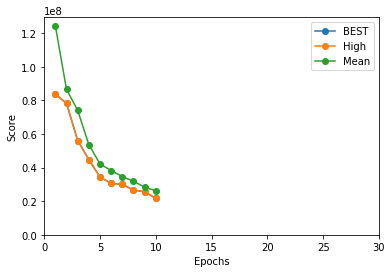

In [6]:
import matplotlib.pyplot as plt

# Score Graph
score_history = np.array(score_history)
high_score_history = np.array(high_score_history)
mean_score_history = np.array(mean_score_history)

plt.plot(score_history[:,0], score_history[:,1], '-o', label='BEST')
plt.plot(high_score_history[:,0], high_score_history[:,1], '-o', label='High')
plt.plot(mean_score_history[:,0], mean_score_history[:,1], '-o', label='Mean')
plt.legend()
plt.xlim(0, EPOCHS)
plt.ylim(bottom=0)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [7]:
# 재고 계산
from data.simulator import Simulator

simulator = Simulator()
order = pd.read_csv('data/order.csv')
submission = best_genomes[0].predict(order)
#print(submission)
_, df_stock = simulator.get_score(submission) 

# PRT 개수 계산
PRTs = df_stock[['PRT_1', 'PRT_2', 'PRT_3', 'PRT_4']].values
PRTs = (PRTs[:-1] - PRTs[1:])[24*23:]
PRTs = np.ceil(PRTs * 1.1)
PAD = np.zeros((24*23+1, 4))
PRTs = np.append(PRTs, PAD, axis=0).astype(int)

# Submission 파일에 PRT 입력
submission.loc[:, 'PRT_1':'PRT_4'] = PRTs
submission.to_csv('HDLY_test_0629.csv', index=False)